# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [10]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

I will be using the DQN experiment as the template and work on the hyperparameters fromt here.

In [1]:
from dqn_agent import Agent
from collections import deque
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [9]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 2.40385975e-03 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 9.42349085e-04 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 3.22759664e-03 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.26536132e-03
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.40756974e-03 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 9.83776525e-04 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.02262944e-03 0.00000000e+00
 0.00000000e+00]
States have length: 37


In [10]:
def dqn(brain_name,n_episodes=1000, max_t=1000, eps_start=0.9, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    ave_scores = []                    # Adding a list for the plotting of avg_scores
    scores_window = deque(maxlen=100)  # Create a list of the 100 most recent scores for averaging
    eps = eps_start                    # initialize epsilon
    solved = False
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]           
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            action = action.astype(int) # Getting an error regarding the type of keys so changing it to INT
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]        
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score to the rolling window
        scores.append(score)              # Add current score to the scores_log
        ave_scores.append(np.mean(scores_window))
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if (np.mean(scores_window)>=13.0 && solved=False):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint-13.pth')
            solved = True
        if np.mean(scores_window)>=50.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint-50.pth')    
            break
    return scores,ave_scores

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### Running the DQN Training

In [12]:
%time scores, avg_scores = dqn(brain_name)

Episode 100	Average Score: 4.09
Episode 200	Average Score: 6.79
Episode 300	Average Score: 10.88
Episode 349	Average Score: 13.00
Environment solved in 249 episodes!	Average Score: 13.00
Episode 350	Average Score: 13.03
Environment solved in 250 episodes!	Average Score: 13.03
Episode 351	Average Score: 13.07
Environment solved in 251 episodes!	Average Score: 13.07
Episode 352	Average Score: 13.15
Environment solved in 252 episodes!	Average Score: 13.15
Episode 353	Average Score: 13.31
Environment solved in 253 episodes!	Average Score: 13.31
Episode 354	Average Score: 13.30
Environment solved in 254 episodes!	Average Score: 13.30
Episode 355	Average Score: 13.22
Environment solved in 255 episodes!	Average Score: 13.22
Episode 356	Average Score: 13.23
Environment solved in 256 episodes!	Average Score: 13.23
Episode 357	Average Score: 13.20
Environment solved in 257 episodes!	Average Score: 13.20
Episode 358	Average Score: 13.38
Environment solved in 258 episodes!	Average Score: 13.38
Epi

Episode 439	Average Score: 14.55
Environment solved in 339 episodes!	Average Score: 14.55
Episode 440	Average Score: 14.54
Environment solved in 340 episodes!	Average Score: 14.54
Episode 441	Average Score: 14.59
Environment solved in 341 episodes!	Average Score: 14.59
Episode 442	Average Score: 14.60
Environment solved in 342 episodes!	Average Score: 14.60
Episode 443	Average Score: 14.55
Environment solved in 343 episodes!	Average Score: 14.55
Episode 444	Average Score: 14.59
Environment solved in 344 episodes!	Average Score: 14.59
Episode 445	Average Score: 14.58
Environment solved in 345 episodes!	Average Score: 14.58
Episode 446	Average Score: 14.66
Environment solved in 346 episodes!	Average Score: 14.66
Episode 447	Average Score: 14.68
Environment solved in 347 episodes!	Average Score: 14.68
Episode 448	Average Score: 14.67
Environment solved in 348 episodes!	Average Score: 14.67
Episode 449	Average Score: 14.61
Environment solved in 349 episodes!	Average Score: 14.61
Episode 45

Episode 531	Average Score: 15.74
Environment solved in 431 episodes!	Average Score: 15.74
Episode 532	Average Score: 15.84
Environment solved in 432 episodes!	Average Score: 15.84
Episode 533	Average Score: 15.91
Environment solved in 433 episodes!	Average Score: 15.91
Episode 534	Average Score: 15.96
Environment solved in 434 episodes!	Average Score: 15.96
Episode 535	Average Score: 15.93
Environment solved in 435 episodes!	Average Score: 15.93
Episode 536	Average Score: 15.95
Environment solved in 436 episodes!	Average Score: 15.95
Episode 537	Average Score: 15.84
Environment solved in 437 episodes!	Average Score: 15.84
Episode 538	Average Score: 15.85
Environment solved in 438 episodes!	Average Score: 15.85
Episode 539	Average Score: 15.87
Environment solved in 439 episodes!	Average Score: 15.87
Episode 540	Average Score: 15.89
Environment solved in 440 episodes!	Average Score: 15.89
Episode 541	Average Score: 15.94
Environment solved in 441 episodes!	Average Score: 15.94
Episode 54

Episode 623	Average Score: 15.73
Environment solved in 523 episodes!	Average Score: 15.73
Episode 624	Average Score: 15.73
Environment solved in 524 episodes!	Average Score: 15.73
Episode 625	Average Score: 15.79
Environment solved in 525 episodes!	Average Score: 15.79
Episode 626	Average Score: 15.69
Environment solved in 526 episodes!	Average Score: 15.69
Episode 627	Average Score: 15.69
Environment solved in 527 episodes!	Average Score: 15.69
Episode 628	Average Score: 15.67
Environment solved in 528 episodes!	Average Score: 15.67
Episode 629	Average Score: 15.63
Environment solved in 529 episodes!	Average Score: 15.63
Episode 630	Average Score: 15.67
Environment solved in 530 episodes!	Average Score: 15.67
Episode 631	Average Score: 15.66
Environment solved in 531 episodes!	Average Score: 15.66
Episode 632	Average Score: 15.53
Environment solved in 532 episodes!	Average Score: 15.53
Episode 633	Average Score: 15.43
Environment solved in 533 episodes!	Average Score: 15.43
Episode 63

Episode 715	Average Score: 16.12
Environment solved in 615 episodes!	Average Score: 16.12
Episode 716	Average Score: 16.08
Environment solved in 616 episodes!	Average Score: 16.08
Episode 717	Average Score: 16.23
Environment solved in 617 episodes!	Average Score: 16.23
Episode 718	Average Score: 16.24
Environment solved in 618 episodes!	Average Score: 16.24
Episode 719	Average Score: 16.31
Environment solved in 619 episodes!	Average Score: 16.31
Episode 720	Average Score: 16.26
Environment solved in 620 episodes!	Average Score: 16.26
Episode 721	Average Score: 16.19
Environment solved in 621 episodes!	Average Score: 16.19
Episode 722	Average Score: 16.09
Environment solved in 622 episodes!	Average Score: 16.09
Episode 723	Average Score: 16.10
Environment solved in 623 episodes!	Average Score: 16.10
Episode 724	Average Score: 16.04
Environment solved in 624 episodes!	Average Score: 16.04
Episode 725	Average Score: 16.02
Environment solved in 625 episodes!	Average Score: 16.02
Episode 72

Episode 807	Average Score: 15.42
Environment solved in 707 episodes!	Average Score: 15.42
Episode 808	Average Score: 15.49
Environment solved in 708 episodes!	Average Score: 15.49
Episode 809	Average Score: 15.47
Environment solved in 709 episodes!	Average Score: 15.47
Episode 810	Average Score: 15.39
Environment solved in 710 episodes!	Average Score: 15.39
Episode 811	Average Score: 15.41
Environment solved in 711 episodes!	Average Score: 15.41
Episode 812	Average Score: 15.43
Environment solved in 712 episodes!	Average Score: 15.43
Episode 813	Average Score: 15.46
Environment solved in 713 episodes!	Average Score: 15.46
Episode 814	Average Score: 15.49
Environment solved in 714 episodes!	Average Score: 15.49
Episode 815	Average Score: 15.60
Environment solved in 715 episodes!	Average Score: 15.60
Episode 816	Average Score: 15.60
Environment solved in 716 episodes!	Average Score: 15.60
Episode 817	Average Score: 15.60
Environment solved in 717 episodes!	Average Score: 15.60
Episode 81

Episode 899	Average Score: 15.86
Environment solved in 799 episodes!	Average Score: 15.86
Episode 900	Average Score: 15.81

Environment solved in 800 episodes!	Average Score: 15.81
Episode 901	Average Score: 15.85
Environment solved in 801 episodes!	Average Score: 15.85
Episode 902	Average Score: 15.75
Environment solved in 802 episodes!	Average Score: 15.75
Episode 903	Average Score: 15.85
Environment solved in 803 episodes!	Average Score: 15.85
Episode 904	Average Score: 15.87
Environment solved in 804 episodes!	Average Score: 15.87
Episode 905	Average Score: 15.96
Environment solved in 805 episodes!	Average Score: 15.96
Episode 906	Average Score: 15.88
Environment solved in 806 episodes!	Average Score: 15.88
Episode 907	Average Score: 15.90
Environment solved in 807 episodes!	Average Score: 15.90
Episode 908	Average Score: 15.76
Environment solved in 808 episodes!	Average Score: 15.76
Episode 909	Average Score: 15.78
Environment solved in 809 episodes!	Average Score: 15.78
Episode 9

Episode 991	Average Score: 16.33
Environment solved in 891 episodes!	Average Score: 16.33
Episode 992	Average Score: 16.45
Environment solved in 892 episodes!	Average Score: 16.45
Episode 993	Average Score: 16.39
Environment solved in 893 episodes!	Average Score: 16.39
Episode 994	Average Score: 16.35
Environment solved in 894 episodes!	Average Score: 16.35
Episode 995	Average Score: 16.39
Environment solved in 895 episodes!	Average Score: 16.39
Episode 996	Average Score: 16.33
Environment solved in 896 episodes!	Average Score: 16.33
Episode 997	Average Score: 16.50
Environment solved in 897 episodes!	Average Score: 16.50
Episode 998	Average Score: 16.49
Environment solved in 898 episodes!	Average Score: 16.49
Episode 999	Average Score: 16.48
Environment solved in 899 episodes!	Average Score: 16.48
Episode 1000	Average Score: 16.50

Environment solved in 900 episodes!	Average Score: 16.50
Wall time: 26min 26s


## Results

Based on the logs generated above, the first episode where the running average of scores reached 13 was in episode 249. The highest score that the agent got during the 1000 episodes of training was 26.0. The highes average score achieved was 16.50. The total time it took for 1000 episodes to run was 26 mins and 26 secs. The environment was solved around the 6-7 minute mark.

In [15]:
max(scores)

26.0

In [16]:
max(avg_scores)

16.5

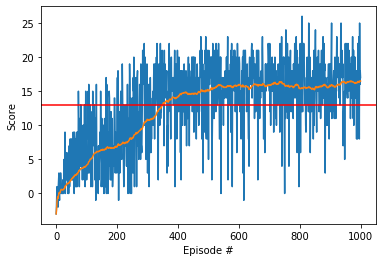

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(y=13.0, color='r', linestyle='-')
plt.show()